# Introduction

This notebook will explore various shooting trends and patterns of NBA players in the 2019-20 regular season. The league has increasingly revolved around the 3-point shot in recent years and the 2020 season was no different. We attempt to dissect just how widespread the 3-pointer was in 2020, and how the rapid growth of the 3, along with other trends on offense, play the leading role in the steady evolution towards "positionless basketball".

We will specifically look at differences in shooting percentages and splits across positions, and hopefully come to the "positionless" conclusion: that the distinction of different positions in the NBA is beginning to lose relevance. Think of position names in other sports — e.g., central attacking midfielder, left tackle, right defensiveman, and more — which generally do tell us where a player stays most of the time, some of their duties + responsibilities for the team, etc. It seems that in basketball, the traditional positions (PG, SG, etc.) no longer serve to capture differences in playing style, shot selection, court positioning, etc. as perhaps they should. We create a variety of aesthetic plots to illustrate this point, along with other relevant statistical trends and anomalies from the season.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Loading the Data

In [2]:
# Import per-game statistics
per_game_stats = pd.read_csv('../Data/Raw/nba_2020_per_game.csv', index_col = 0)

In [3]:
per_game_stats.head()

Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  \
Player                                                                        
Steven Adams               C   26  OKC  63  63  26.7  4.5   7.6  0.592  0.0   
Bam Adebayo               PF   22  MIA  72  72  33.6  6.1  11.0  0.557  0.0   
LaMarcus Aldridge          C   34  SAS  53  53  33.1  7.4  15.0  0.493  1.2   
Kyle Alexander            PF   23  MIA   2   0   6.5  0.5   1.0  0.500  0.0   
Nickeil Alexander-Walker  SG   21  NOP  47   1  12.6  2.1   5.7  0.368  1.0   

                          ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
Player                    ...                                                   
Steven Adams              ...  0.582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9   
Bam Adebayo               ...  0.691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5   
LaMarcus Aldridge         ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4   
Kyle Alexander            ...    NaN  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   
Nickeil Alexander-Walker  ...  0.676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   

                           PTS  
Player                          
Steven Adams              10.9  
Bam Adebayo               15.9  
LaMarcus Aldridge         18.9  
Kyle Alexander             1.0  
Nickeil Alexander-Walker   5.7  

[5 rows x 28 columns]

In [4]:
# Import shooting statistics
shooting_stats = pd.read_csv('../Data/raw/nba_2020_shooting.csv', index_col = 0)

In [5]:
shooting_stats.head()

Pos  Age   Tm   G    MP    FG%  Dist.  2P Proportion  \
Player                                                                          
Steven Adams               C   26  OKC  63  1680  0.592    4.4          0.994   
Bam Adebayo               PF   22  MIA  72  2417  0.557    5.8          0.982   
LaMarcus Aldridge          C   34  SAS  53  1754  0.493   13.7          0.802   
Kyle Alexander            PF   23  MIA   2    13  0.500    1.5          1.000   
Nickeil Alexander-Walker  SG   21  NOP  47   591  0.368   15.9          0.500   

                          0-3 Proportion  3-10 Proportion  ...  16-3P FG%  \
Player                                                     ...              
Steven Adams                       0.513            0.397  ...      1.000   
Bam Adebayo                        0.481            0.301  ...      0.227   
LaMarcus Aldridge                  0.202            0.129  ...      0.433   
Kyle Alexander                     1.000            0.000  ...        NaN   
Nickeil Alexander-Walker           0.244            0.173  ...      0.375   

                          3P FG%  2P Proportion Astd  3P Proportion Astd  \
Player                                                                     
Steven Adams               0.333               0.670               1.000   
Bam Adebayo                0.143               0.715               0.500   
LaMarcus Aldridge          0.389               0.567               0.951   
Kyle Alexander               NaN               0.000                 NaN   
Nickeil Alexander-Walker   0.346               0.192               0.913   

                          %FGA Dunks  # Dunks  %3PA Corner 3s  3P% Corner 3s  \
Player                                                                         
Steven Adams                   0.176       78           0.333          0.000   
Bam Adebayo                    0.219      157           0.571          0.125   
LaMarcus Aldridge              0.044       31           0.185          0.379   
Kyle Alexander                 0.000        0             NaN            NaN   
Nickeil Alexander-Walker       0.008        2           0.188          0.360   

                          Att. Heaves  # Heaves  
Player                                           
Steven Adams                        1         1  
Bam Adebayo                         1         0  
LaMarcus Aldridge                   1         0  
Kyle Alexander                      0         0  
Nickeil Alexander-Walker            4         0  

[5 rows x 27 columns]

# Cleaning the Data

## Merging the 2 Data Frames into 1

In [6]:
stats = pd.concat([per_game_stats, shooting_stats.iloc[:, 6:]], axis = 1)

In [7]:
stats.head()

Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  \
Player                                                                        
Steven Adams               C   26  OKC  63  63  26.7  4.5   7.6  0.592  0.0   
Bam Adebayo               PF   22  MIA  72  72  33.6  6.1  11.0  0.557  0.0   
LaMarcus Aldridge          C   34  SAS  53  53  33.1  7.4  15.0  0.493  1.2   
Kyle Alexander            PF   23  MIA   2   0   6.5  0.5   1.0  0.500  0.0   
Nickeil Alexander-Walker  SG   21  NOP  47   1  12.6  2.1   5.7  0.368  1.0   

                          ...  16-3P FG%  3P FG%  2P Proportion Astd  \
Player                    ...                                          
Steven Adams              ...      1.000   0.333               0.670   
Bam Adebayo               ...      0.227   0.143               0.715   
LaMarcus Aldridge         ...      0.433   0.389               0.567   
Kyle Alexander            ...        NaN     NaN               0.000   
Nickeil Alexander-Walker  ...      0.375   0.346               0.192   

                          3P Proportion Astd  %FGA Dunks  # Dunks  \
Player                                                              
Steven Adams                           1.000       0.176       78   
Bam Adebayo                            0.500       0.219      157   
LaMarcus Aldridge                      0.951       0.044       31   
Kyle Alexander                           NaN       0.000        0   
Nickeil Alexander-Walker               0.913       0.008        2   

                          %3PA Corner 3s  3P% Corner 3s  Att. Heaves  # Heaves  
Player                                                                          
Steven Adams                       0.333          0.000            1         1  
Bam Adebayo                        0.571          0.125            1         0  
LaMarcus Aldridge                  0.185          0.379            1         0  
Kyle Alexander                       NaN            NaN            0         0  
Nickeil Alexander-Walker           0.188          0.360            4         0  

[5 rows x 49 columns]

In [8]:
print("The dataset contains {} players with {} different statistical categories.".format(stats.shape[0], stats.shape[1]))

The dataset contains 651 players with 49 different statistical categories.


## Missing Values

In [9]:
stats.isnull().sum()

Pos                    0
Age                    0
Tm                     0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                    2
3P                     0
3PA                    0
3P%                   35
2P                     0
2PA                    0
2P%                    6
eFG%                   2
FT                     0
FTA                    0
FT%                   33
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
Dist.                  2
2P Proportion          2
0-3 Proportion         2
3-10 Proportion        2
10-16 Proportion       2
16-3P Proportion       2
3P Proportion          2
2P FG%                 6
0-3 FG%               24
3-10 FG%              36
10-16 FG%             79
16-3P FG%             99


In our case, it probably makes the most sense to simply impute all of the missing values with 0, since it is likely that the reason that a particular statistic is missing for a player is that the player simply didn't register enough/any attempts in that category.

In [10]:
stats.fillna(0, inplace = True)
stats.isnull().sum().sum()

0

There are now no missing values in the data, so we can move forward.

## Multiple Rows for the Same Player

In some cases, one player will have more than one row in the data; this is due to players switching teams mid-season and having one row for each of their teams. Here, we'll replace these multiple rows with a single row containing averages across all of the player's teams. (We could make this a weighted average, but since we shouldn't expect players' averages to change *too* much from one team to another, a simple mean should be fine.)

In [11]:
df = stats.groupby(level = 0).mean().round(3)

Looks like we lost our categorical Position and Team columns in the process (this has to do with how the apply function works on a groupby object). Let's get those columns back in order below.

In [12]:
cat_features = ['Pos', 'Tm']

In [13]:
df = stats.groupby(level = 0).apply(lambda x: x.iloc[0])[cat_features].merge(df, left_index = True, right_index = True)

In [14]:
df.head()

Pos   Tm  Age     G    GS    MP   FG   FGA    FG%   3P  ...  \
Player                                                                    ...   
Aaron Gordon       PF  ORL   24  62.0  62.0  32.5  5.4  12.4  0.437  1.2  ...   
Aaron Holiday      PG  IND   23  66.0  33.0  24.5  3.5   8.5  0.414  1.3  ...   
Abdel Nader        SF  OKC   26  55.0   6.0  15.8  2.2   4.8  0.468  0.9  ...   
Adam Mokoka        SG  CHI   21  11.0   0.0  10.2  1.1   2.5  0.429  0.5  ...   
Admiral Schofield  SF  WAS   22  33.0   2.0  11.2  1.1   2.8  0.380  0.6  ...   

                   16-3P FG%  3P FG%  2P Proportion Astd  3P Proportion Astd  \
Player                                                                         
Aaron Gordon           0.162   0.308               0.500               0.890   
Aaron Holiday          0.407   0.394               0.288               0.839   
Abdel Nader            0.250   0.375               0.653               0.979   
Adam Mokoka            0.000   0.400               0.667               1.000   
Admiral Schofield      0.500   0.311               0.688               1.000   

                   %FGA Dunks  # Dunks  %3PA Corner 3s  3P% Corner 3s  \
Player                                                                  
Aaron Gordon            0.124     88.0           0.177          0.333   
Aaron Holiday           0.005      2.0           0.167          0.432   
Abdel Nader             0.034      9.0           0.328          0.429   
Adam Mokoka             0.000      0.0           0.533          0.375   
Admiral Schofield       0.033      2.0           0.295          0.500   

                   Att. Heaves  # Heaves  
Player                                    
Aaron Gordon               6.0       0.0  
Aaron Holiday              1.0       0.0  
Abdel Nader                0.0       0.0  
Adam Mokoka                0.0       0.0  
Admiral Schofield          1.0       0.0  

[5 rows x 49 columns]

In [15]:
print("We now have {} players with {} different statistical categories.".format(df.shape[0], df.shape[1]))

We now have 529 players with 49 different statistical categories.


## Clean 'Pos' Column

A few of the positions are not as clean as we would like

In [16]:
df['Pos'].value_counts()

SG       139
PF       101
PG        95
C         94
SF        89
SF-PF      4
SF-SG      3
PF-C       2
C-PF       2
Name: Pos, dtype: int64

We want to classify every player as one of the 5 textbook positions: PG, SG, SF, PF, C. Let's parse out the "-PF", etc. attached to some of the position tags.

In [17]:
df['Pos'] = df['Pos'].apply(lambda x: x.split('-')[0])

In [18]:
df['Pos'].value_counts()

SG    139
PF    103
SF     96
C      96
PG     95
Name: Pos, dtype: int64

## Set Games and Minutes Played Requirement

We really only want to consider players who played a statistically significant amount this season. (These cutoffs are somewhat arbitrary, but that's okay; we just want to filter out players who had very limited playing time.)

In [19]:
games_req = 30
mins_req = 15

In [20]:
df = df.loc[df['G'] >= games_req].loc[df['MP'] >= mins_req]

In [21]:
print("We are left with {} eligible players.".format(df.shape[0]))

We are left with 295 eligible players.


## Overview of Cleaned Data

Now all of our stats are gathered in one final, cleaned data frame, and we can work directly with this single *df* from here on out. Let's quickly look over this *df*:

In [22]:
df.describe()

Age           G          GS          MP          FG         FGA  \
count  295.000000  295.000000  295.000000  295.000000  295.000000  295.000000   
mean    26.023729   56.774007   33.112986   25.597973    4.422824    9.559878   
std      4.066134   11.379868   24.373312    6.030496    2.092351    4.406871   
min     19.000000   30.000000    0.000000   15.100000    1.300000    3.000000   
25%     23.000000   48.500000    8.500000   19.900000    2.850000    6.000000   
50%     26.000000   59.000000   32.000000   25.800000    3.900000    8.300000   
75%     29.000000   66.000000   57.000000   30.750000    5.700000   12.333500   
max     38.000000   74.000000   73.000000   37.500000   10.900000   22.900000   

              FG%          3P         3PA         3P%  ...   16-3P FG%  \
count  295.000000  295.000000  295.000000  295.000000  ...  295.000000   
mean     0.464468    1.314234    3.631973    0.332044  ...    0.352905   
std      0.069659    0.894867    2.287051    0.092464  ...    0.171346   
min      0.333000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.423000    0.700000    2.166500    0.314000  ...    0.277000   
50%      0.449000    1.200000    3.400000    0.352000  ...    0.383000   
75%      0.487000    1.900000    5.000000    0.382500  ...    0.454000   
max      0.742000    4.400000   12.400000    0.600000  ...    1.000000   

           3P FG%  2P Proportion Astd  3P Proportion Astd  %FGA Dunks  \
count  295.000000          295.000000          295.000000  295.000000   
mean     0.332044            0.536512            0.817383    0.070414   
std      0.092464            0.192773            0.237256    0.097320   
min      0.000000            0.099000            0.000000    0.000000   
25%      0.314000            0.391000            0.753500    0.011000   
50%      0.352000            0.564000            0.902000    0.037000   
75%      0.382500            0.696500            0.973000    0.086500   
max      0.600000            0.897000            1.000000    0.616000   

          # Dunks  %3PA Corner 3s  3P% Corner 3s  Att. Heaves    # Heaves  
count  295.000000      295.000000     295.000000   295.000000  295.000000  
mean    28.711871        0.232108       0.362115     1.149163    0.030508  
std     36.583071        0.149039       0.149258     1.615185    0.172274  
min      0.000000        0.000000       0.000000     0.000000    0.000000  
25%      4.000000        0.137000       0.313000     0.000000    0.000000  
50%     16.000000        0.210000       0.382000     1.000000    0.000000  
75%     35.500000        0.307500       0.436000     2.000000    0.000000  
max    221.000000        1.000000       1.000000    11.000000    1.000000  

[8 rows x 47 columns]

In [23]:
df.columns

Index(['Pos', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Dist.',
       '2P Proportion', '0-3 Proportion', '3-10 Proportion',
       '10-16 Proportion', '16-3P Proportion', '3P Proportion', '2P FG%',
       '0-3 FG%', '3-10 FG%', '10-16 FG%', '16-3P FG%', '3P FG%',
       '2P Proportion Astd', '3P Proportion Astd', '%FGA Dunks', '# Dunks',
       '%3PA Corner 3s', '3P% Corner 3s', 'Att. Heaves', '# Heaves'],
      dtype='object')

In [24]:
# Ouput cleaned data to new csv file
df.to_csv('../Data/Cleaned/nba_2020_shooting_stats_cleaned.csv')

# Visualizations

In [25]:
# Set style for ensuing plots
plt.style.use(['seaborn-whitegrid'])
sns.set_palette('pastel')

In [26]:
# Set default font styles + sizes
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size' : 14}
plt.rc('font', **font)  # Pass in the font dict as kwargs
plt.rc('axes', labelsize = 20)
plt.rc('axes', titlesize = 28)
plt.rc('figure', titlesize = 28)

Let's now do a quick visual overview of some of this season's shooting trends.

## How Do the Top Scorers Shoot?

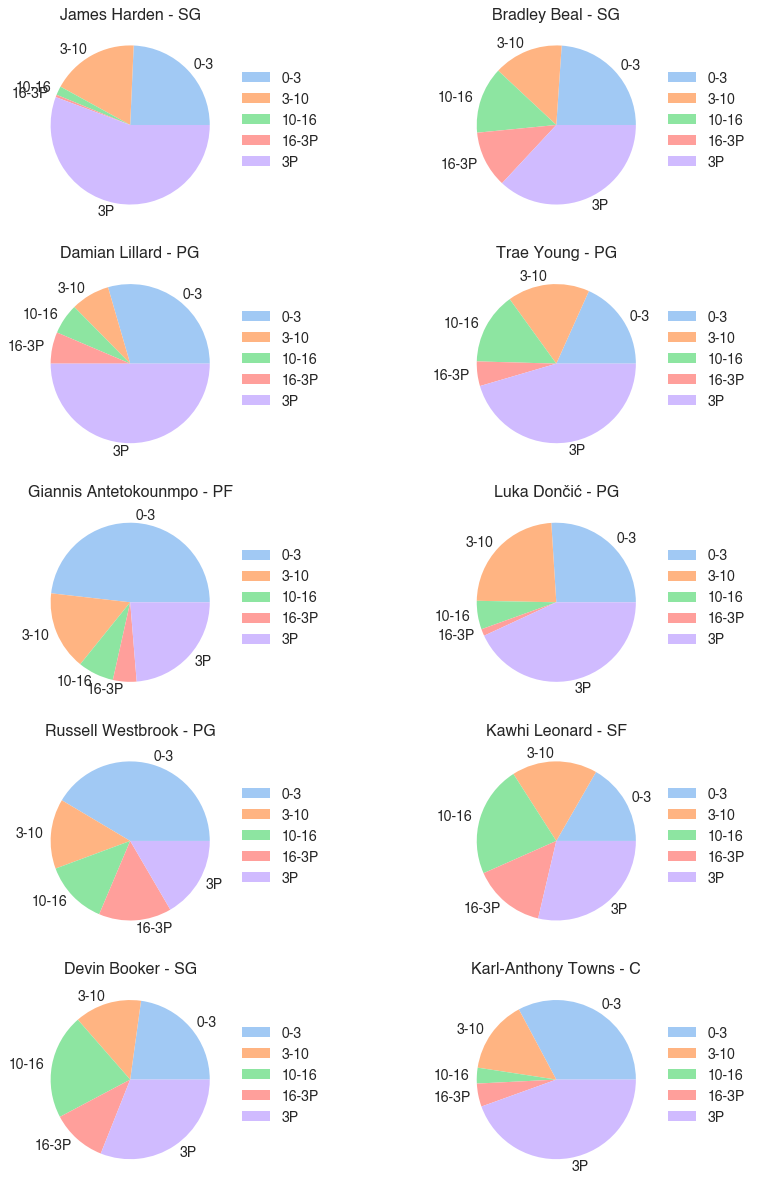

In [27]:
# How the top scorers got their buckets, broken down by shooting range
df_top_scorers = df.sort_values('PTS', ascending = False)[:20]
shooting_ranges = ['0-3 Proportion', '3-10 Proportion', '10-16 Proportion', '16-3P Proportion', '3P Proportion']
shooting_range_labels = [x.replace(' Proportion', '') for x in shooting_ranges]

fig, axes = plt.subplots(5, 2, figsize = (14, 20))

for i, ax in enumerate(axes.flatten()):
    ax.pie(x = df_top_scorers[shooting_ranges].iloc[i], labels = shooting_range_labels, radius = 1.5, normalize = True)
    ax.set_title(df_top_scorers.index[i] + ' - ' + df_top_scorers['Pos'][i], fontsize = 16, pad = 40)
    ax.legend(bbox_to_anchor=(1.25, 1), fontsize = 14)
    
fig.subplots_adjust(hspace = 0.8);

We can quickly see a couple simple things:
- The relative lack of mid-range shooting is very apparent
- The 3-point shot dominates many of the top scorer's shooting proportions

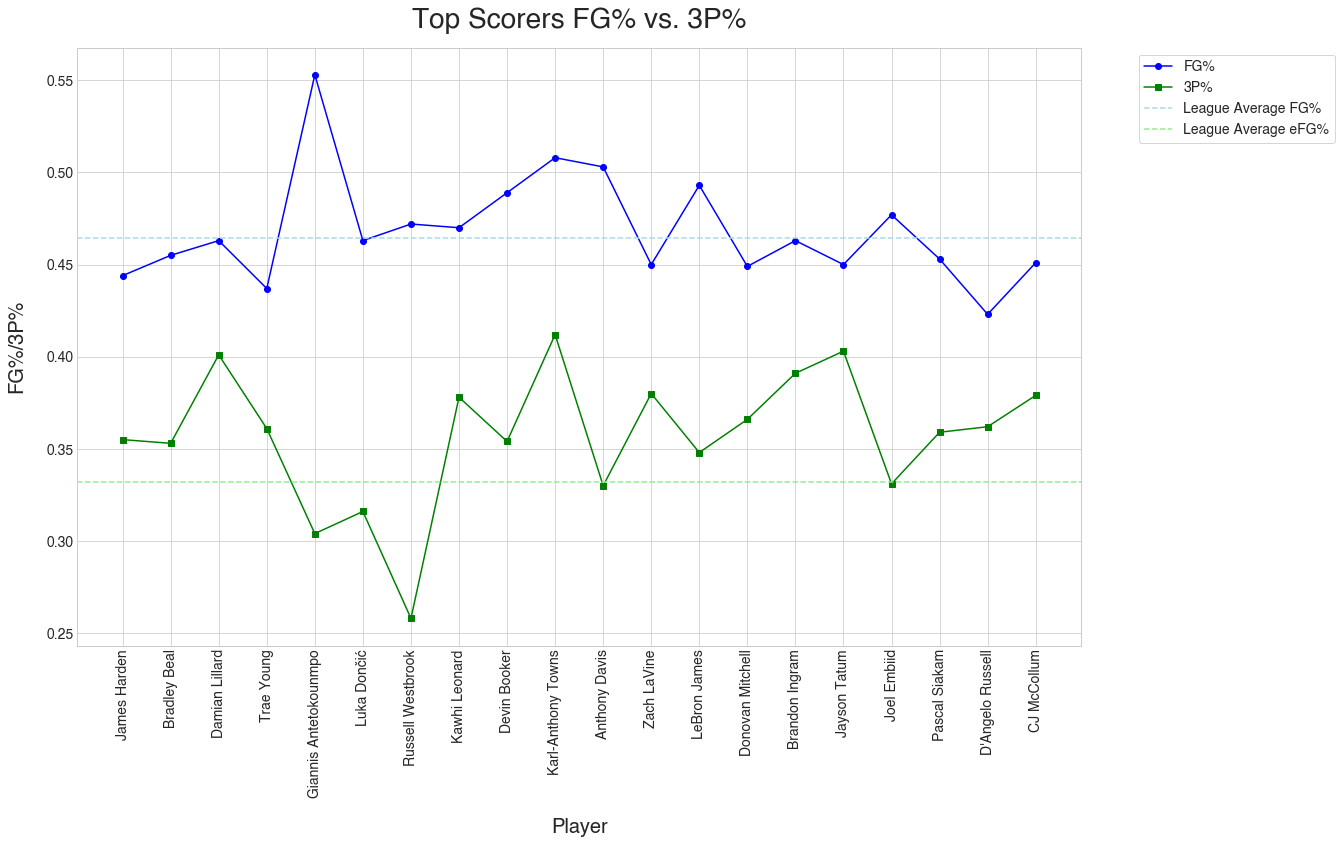

In [28]:
# How (relatively) efficient these top scorers were
fig, ax = plt.subplots(figsize = (18, 11))

ax.plot('FG%', data = df_top_scorers, marker = 'o', color = 'blue')
ax.plot('3P%', data = df_top_scorers, marker = 's', color = 'green')
ax.axhline(y = np.mean(df['FG%']), linestyle = 'dashed', color = 'lightblue', label = 'League Average FG%')
ax.axhline(y = np.mean(df['3P%']), linestyle = 'dashed', color = 'lightgreen', label = 'League Average eFG%')

ax.set_xlabel('Player', labelpad = 20)
ax.set_ylabel('FG%/3P%', labelpad = 20)
ax.set_xticks(df_top_scorers.index)
ax.set_xticklabels(df_top_scorers.index, rotation = 90)
ax.set_title("Top Scorers FG% vs. 3P%", pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

The above plot lets us easily spot the shooting efficiency of these top players. For example, we can see that with a couple exceptions, the top scorers are mostly above average 3-point shooters, again emphasizing the importance of the 3-point shot in the modern NBA. Interestingly enough, two of the worst 3-point shooters depicted are point guards, not big men as would be the typical culprit for poor perimeter shooting before the "positionless" evolution.

Those were the top scorers, but how about the rest of the league? How do they shoot the ball?

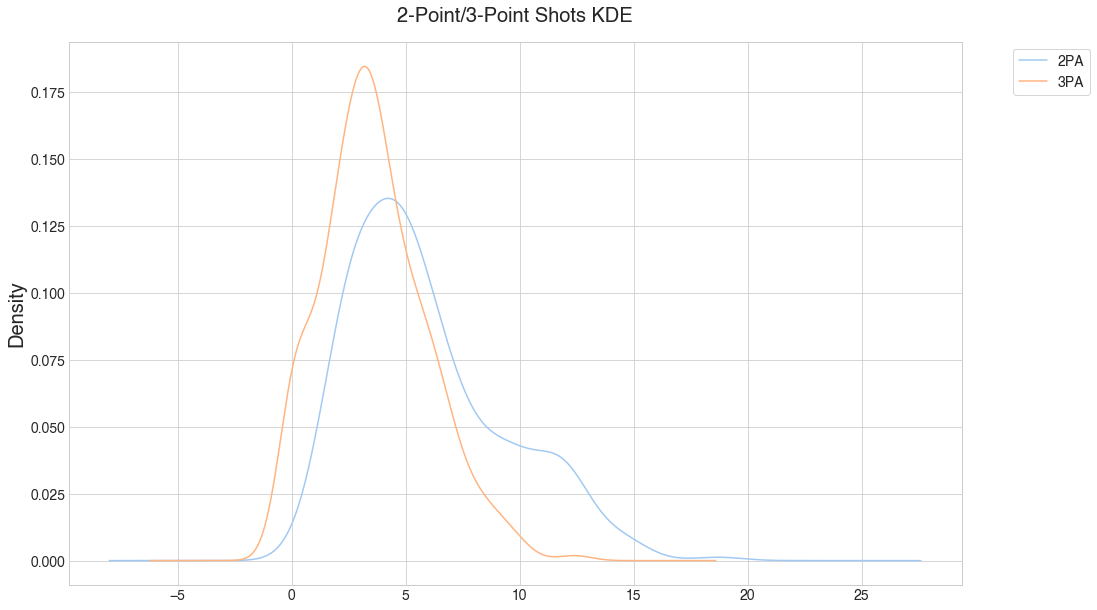

In [29]:
fig, ax = plt.subplots(figsize = (16, 10))

df[['2PA', '3PA']].plot.kde(ax = ax)

ax.set_title("2-Point/3-Point Shots KDE", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.show();

The density curves for 2PA and 3PA are pretty close to each other here! Players are almost at the point where 3-point attempts match 2-point attempts - that is, almost every other shot they take is a 3 (almost). However, when it comes to other shot types, particularly mid-range shots, a whole different trend exists.

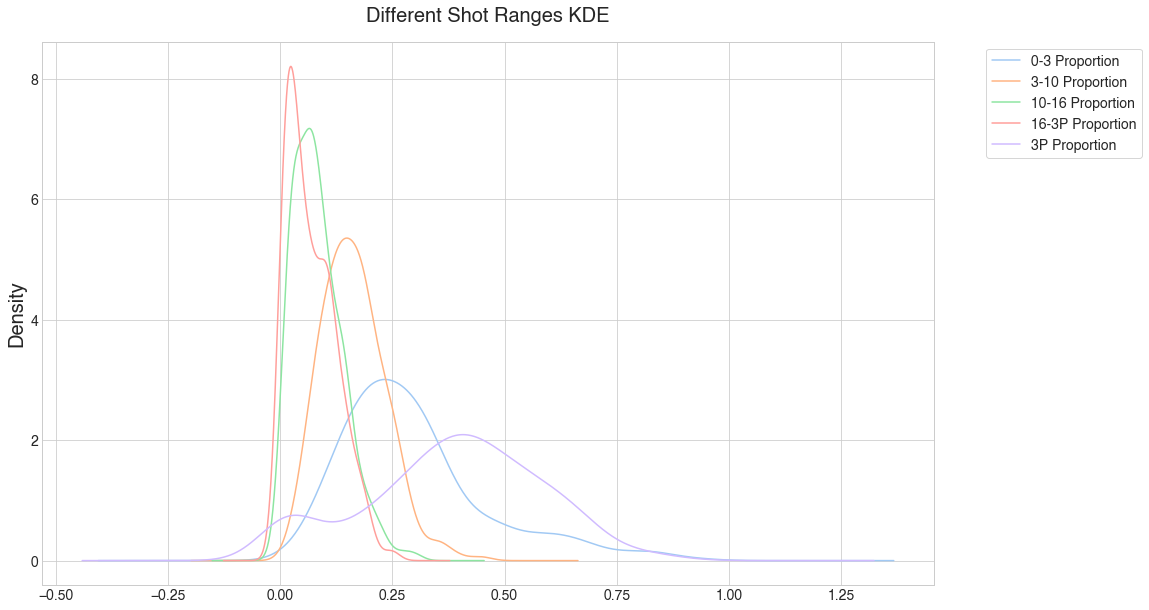

In [30]:
fig, ax = plt.subplots(figsize = (16, 10))

df[['0-3 Proportion', '3-10 Proportion', '10-16 Proportion', '16-3P Proportion', '3P Proportion']].plot.kde(ax = ax)

ax.set_title("Different Shot Ranges KDE", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.show();

Let's now take a closer look at the use (and sometimes misuse) of the 3-ball in particular, throughout the whole league.

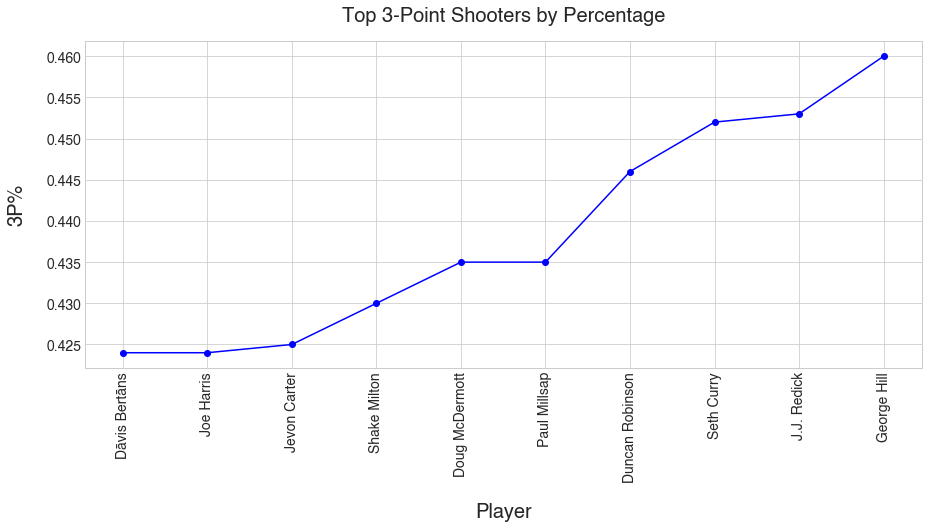

In [31]:
# The league's very best 3-point shooters
df_3P_shooters = df[df['3PA'] >= 1]    # Set an attempts requirement

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot('3P FG%', data = df_3P_shooters.sort_values('3P FG%', ascending = False)[:10].iloc[::-1], marker = 'o', color = 'blue')

ax.set_xlabel('Player', labelpad = 20)
ax.set_ylabel('3P%', labelpad = 20)
ax.set_xticks(df_3P_shooters.index)
ax.set_xticklabels(df_3P_shooters.index, rotation = 90)
ax.set_title("Top 3-Point Shooters by Percentage", fontsize = 20, pad = 20)

plt.axis('tight');

A side-note for later: I noticed that, at least according to my knowledge of these players, almost all of them above can be classified as playing a very particular style on the floor; they're "catch-and-shoot specialists." These players are very similar to each other, even though they may play different positions. Just something interesting to note when I bring up the notion of redefining new positions later on in this notebook.

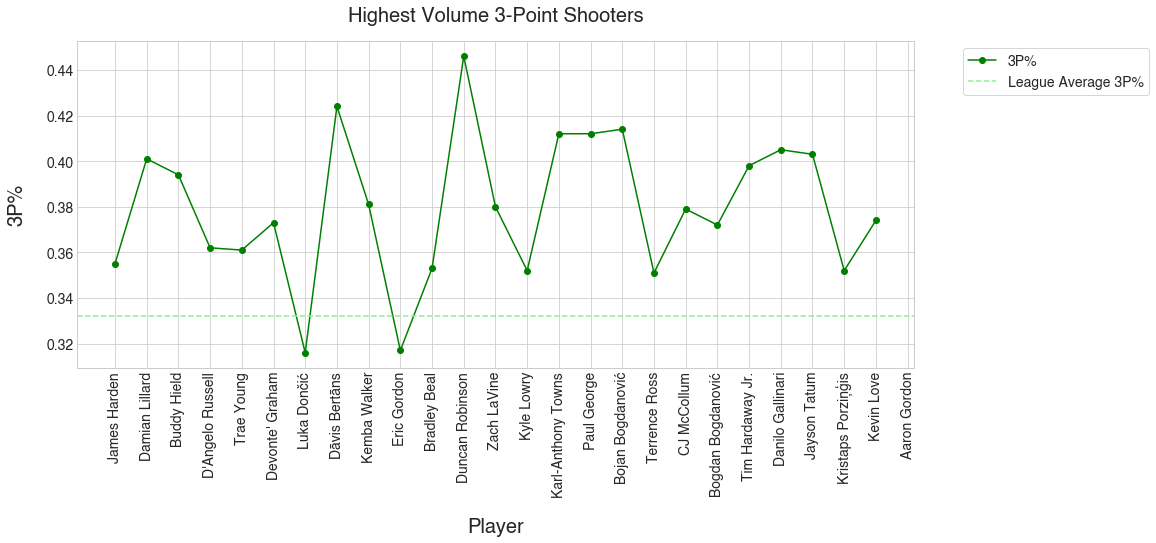

In [32]:
fig, ax = plt.subplots(figsize = (15, 6))

ax.plot('3P%', data = df_3P_shooters.sort_values('3PA', ascending = False)[:25], marker = 'o', color = 'green')
ax.axhline(y = np.mean(df['3P%']), linestyle = 'dashed', label = "League Average 3P%", color = 'lightgreen')

ax.set_xlabel('Player', labelpad = 20)
ax.set_ylabel('3P%', labelpad = 20)
ax.set_xticks(df_3P_shooters.index)
ax.set_xticklabels(df_3P_shooters.index, rotation = 90)
ax.set_title("Highest Volume 3-Point Shooters", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

In [33]:
plt.figure()

fig = px.scatter(df_3P_shooters, x = '3PA', y = '3P%', hover_data = [df_3P_shooters.index], size = 'FGA', color = 'Pos')

fig.update_layout(title_text = "3-Point Shooting Across Positions", title_x = 0.5, xaxis_title = '3-Point Attempts', yaxis_title = '3-Point Field Goal %')

fig.show();

<Figure size 432x288 with 0 Axes>

Here, at a glance, we see a couple noteworthy things. We can notice our first indicator that the league truly is shifting towards being "positionless" (at least in the case of 3-pointers). While a lot of centers still don't shoot the 3 too much, it is still a blurred line in 3-point attempts and percentages across the other 4 positions - look especially at the middle of the above plot, around 2-5 3PA, where all of the positions are blended together. 

We can even notice the traditional positions' losing their differentiating power by looking at the several preceding plots. Quite a few of the league-leading 3-point shooters are not your traditional smaller guards: look at Robinson(SF), Bertans(PF), McDermott(PF), Millsap(PF), and so on. (Side note: conversely, many of the worst shooters are actually guards)

In [34]:
# An alternate view of the idea mentioned above
plt.figure()

fig = px.scatter(df, x = 'FGA', y = '3PA', hover_data = [df.index], color = 'Pos')

fig.update_layout(title_text = "Shooting Attempts Across Positions", title_x = 0.5, xaxis_title = '3-Point Attempts', yaxis_title = '3-Point Field Goal %')

fig.show();

<Figure size 432x288 with 0 Axes>

Okay, so we've established just how prevelant the 3-pointer is in the modern NBA, from the very best scorers to catching-and-shooting aficionados. Now, let's narrow down the problem at hand to our original claim: that the league is going positionless and there is a need for a more defining positional nomenclature to distinguish different classes of players.

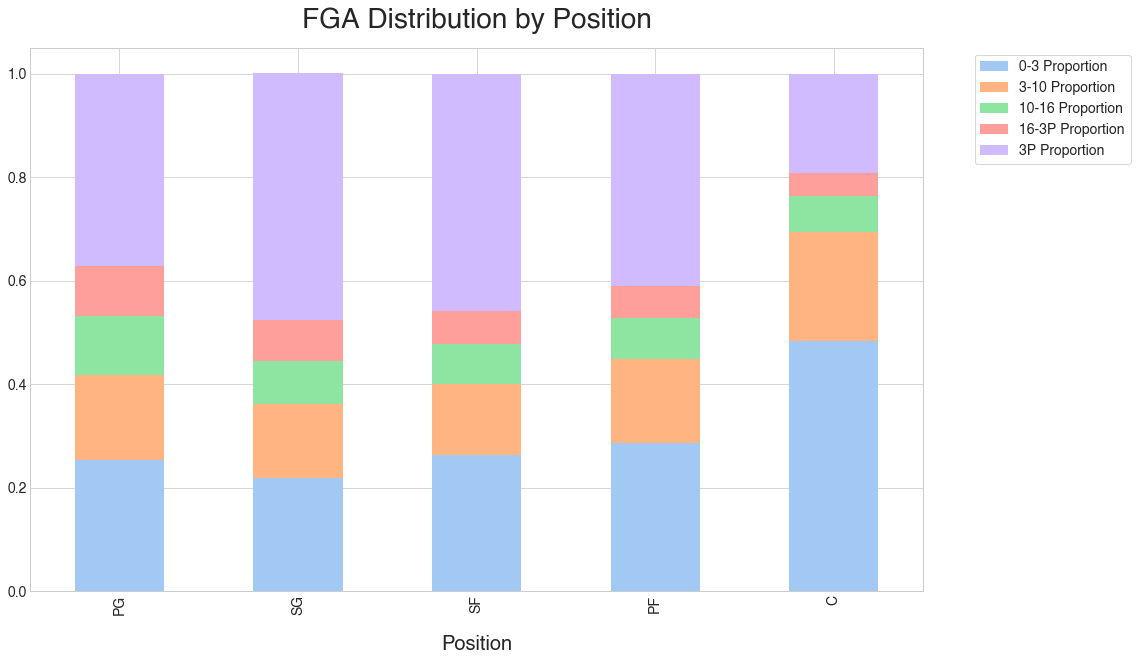

In [35]:
fig, ax = plt.subplots(figsize = (16, 10))

df_by_pos = df.groupby('Pos').apply(np.mean).reindex(['PG', 'SG', 'SF', 'PF', 'C'])

df_by_pos[['0-3 Proportion', '3-10 Proportion', '10-16 Proportion', '16-3P Proportion', '3P Proportion']].plot.bar(stacked = True, ax = ax)

ax.set_xlabel('Position', labelpad = 20)
ax.set_title("FGA Distribution by Position", pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.show();

This clearly show the wide use and overall importance of the 3-point shot in today's NBA; in fact, for 4 of the 5 positions,  

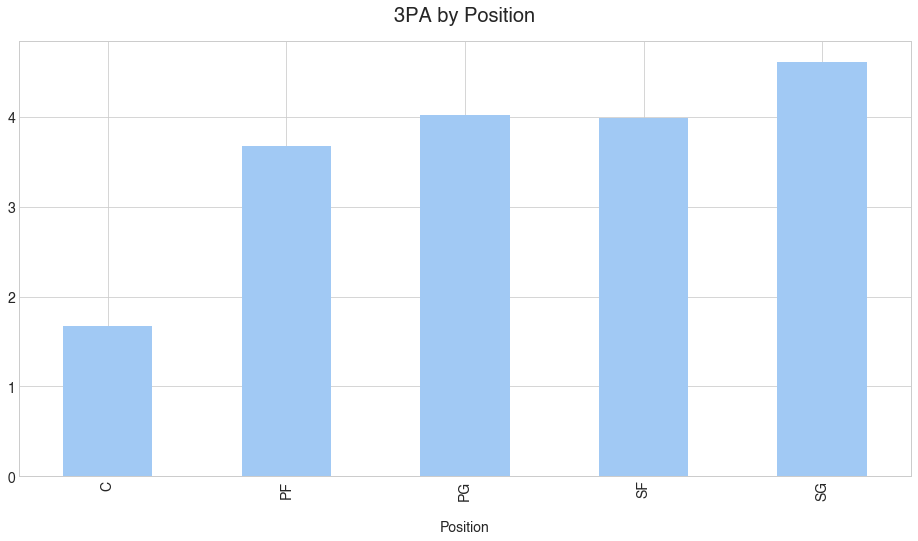

In [36]:
df_by_pos = df.groupby('Pos').apply(np.mean)

fig, ax = plt.subplots(figsize = (16, 8))

ax = df_by_pos['3PA'].plot.bar()
ax.set_xlabel('Position', fontsize = 14, labelpad = 20)
ax.set_title("3PA by Position", fontsize = 20, pad = 20)

plt.show();

It's becoming pretty difficult to discern between different positions looking at the shooting numbers. Imagine looking at this plot and trying to denote which bar corresponded to which position. Pretty difficult, apart from perhaps the Center bar. And isn't shooting arguably the most defining statistic for separating types of players? 

In the book, *Basketball on Paper* (which is basketball's version of *Moneyball* and an excellent read for sports analytics junkies), Dean Oliver identified what he called the "Four Factors of Basketball Success":

- Shooting (40%)
- Turnovers (25%)
- Rebounding (20%)
- Free Throws (15%)

So, shooting is the most important factor, followed by turnovers, rebounding, and free throws. The "Four Factors" were based on Oliver's extension research of the stats behind winning teams. He claims that shooting is the most important factor. As a side note, this is part of the inspiration behind my using shooting stats as the primary basis for recategorizing players into newly defined positions.

(source: https://www.breakthroughbasketball.com/stats/effective-field-goal-percentage.html)

In summary, with the exception of the center position, positions really become blurred together when it comes to shot selection. The 3 has become so ingrained into the modern game that the traditional positions don't really encapsulate the different classes of players anymore. For example, look at these players who are both classified as power forwards: 
- Davis Bertans, who shot 8.7 of his 11.3 shots/game from 3-point range
- Domantas Sabonis, who shot 1.1 of his 13.7 shots/game from 3

Or, look at these rival, star point guards:
- Damian Lillard - 10.2 of 20.4 shots/game from 3
- Russell Westbrook - 3.7 of 22.5 shots/game from 3

So does it really make much sense to lump these sets of highly contrasting players into the same position when the way they score - and fundamentally, the way they play - is so different? To me, a position is meant to label a player's style of playing and how they contribute to the team. Think about positions in football (soccer): the positions roughly denote the location on the pitch that a player predominantly fills and controls. Similarly in other sports like American football and hockey. If we really think about it, this already exist at some level in basketball; some players are pretty exclusively 3-point shooters waiting on the perimeter for spot-up looks (we hinted at this group earlier), other players might be purely interior lob threats, etc. 

I think it would be neat to consider a roughly equivalent position system in basketball. That leads us to the future part of this project, which aims to boil down the different shooting tendencies of players into new categories, redefining the notion of positions in NBA basketball.